# REGRESSÃO LOGÍSTICA

### Neste notebook você encontrará:

**Referências e DataSet**<br/>
**Introdução ao Algoritmo**<br/>
**Como Funciona**<br/>
**Prós e Contras do Modelo**<br/>
**Aplicando Regressão Logística - Pima Indians Diabetes Database**

### Referências

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

### DataSet

https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Introdução ao Algoritmo

A Regressão Logística (também conhecido como logit, MaxEnt) é um modelo estatístico usado para determinar a probabilidade de sucesso e falha do evento. É semelhante a Regressão Linear, porém, usado quando o resultado é binário (1/0, Verdadeiro/Falso, Sim/Não). Sendo assim, pode ser usado para vários problemas de classificação onde, dado conjunto de características, responderemos se algum evento ocorre ou não ocorre, ou sua probabilidade. <br/>

Algumas aplicações reais:<br/>
- Um exemplo de uso no setor financeiro é em uma empresa de cartão de crédito, utilizando para prever a probabilidade de um cliente não pagar suas faturas. O modelo construído pode ser para a emissão de um cartão de crédito para um cliente ou não. O modelo pode dizer se um determinado cliente “ficará inadimplente” ou “não ficará inadimplente”. Isso é conhecido como “modelagem de propensão de padrão” em termos bancários.
<br/>

- Na mesma linha, as empresas de comércio eletrônico investem pesadamente em campanhas publicitárias e promoções em toda a mídia. Eles querem ver qual campanha é a mais eficaz e a opção com maior probabilidade de obter uma resposta de seu público-alvo potencial. O conjunto de modelos categorizará o cliente como “respondente” ou “não respondente” a campanha. Este modelo é chamado de modelagem de propensão para resposta.
<br/>

- A regressão logística pode ser usada em engenharia para prever o sucesso ou falha de um sistema que está sendo testado ou de um protótipo de produto.


Existem três tipos básicos:

**Regressão Logística Binomial**: <br/>
Há apenas dois resultados possíveis para a resposta categórica.

**Regressão Logística Multinomial**: <br/>
Podem incluir três ou mais tipos de resultados que não estarão em nenhuma ordem.
<br/>Por exemplo: prever se os clientes de um restaurante preferem um certo tipo de comida (vegetariana, carne ou vegana).

**Regressão Logística Ordinal**: <br/>
Semelhante a multinominal, no entanto, há uma ordem que as medições seguem.
<br/>Por exemplo: classificar um hotel em uma escala de 1 a 5 estrelas.

### Como Funciona

Na regressão linear, traçamos uma reta que melhor se adequa ao conjunto de dados minimizando o erro quadrático médio, já na regressão logística o resultado é estimado através da máxima verossimilhança.

Do ponto de vista estatístico, o estimador de máxima verossimilhança define a média e a variância como parâmetros na determinação dos valores paramétricos específicos para um determinado modelo. Este conjunto de parâmetros pode ser usado para prever os dados necessários em uma distribuição normal. Ou seja, ele assume uma função de densidade de probabilidade.

Podemos então interpretar o resultado da regressão logística de duas formas, obtendo o percentual da chance de certo evento acontecer, ou, se o resultado for maior que 0,5 classificá-lo como 1 ou SIM, e se for menor que 0,5  classificá-lo como 0 ou NÃO.

O cálculo do resultado é dado através da função sigmoide, também chamada de função logística. Ela fornece uma curva em forma de 'S' que pode pegar qualquer número de valor real e mapeá-lo em um valor entre 0 e 1. Se a curva for para infinito positivo, y previsto se tornará 1, e se a curva vai para o infinito negativo, y previsto se tornará 0. <br/>
<br/>

<br/>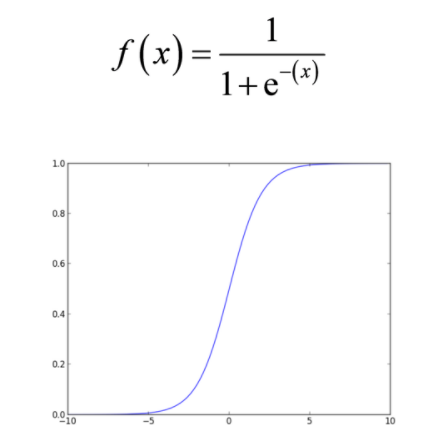<br/>

### Prós e Contras

**Prós:**<br/>

- Fácil de implementar, interpretar e simples de treinar
- Pode facilmente se estender a várias classes como nos casos multinomial e ordinal
- Boa precisão para muitos conjuntos de dados simples e bom desempenho quando o conjunto de dados é linearmente separável

**Contras:**<br/>

- Não pode ser usada para resolver problemas não lineares, ou seja, que contém inequações
- Vulnerável ao overfitting, apresentando bons resultados somente nos treinos
- Depende muito da apresentação dos dados de entrada. Necessário boa correlação entre a característica e o resultado
- Não apresenta bons resultados em problemas de muitas características

### Aplicando Regressão Logística - Prever o Aparecimento de Diabetes com Base em Medidas de Diagnóstico

**Pima Indians Diabetes Database**

**Contexto**

<br/>
Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais.<br/>
O objetivo aqui é prever se um paciente tem ou não diabetes, embasado em medidas providas de diagnóstico. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de ascendência indígena Pima.

**Conteúdo**

<br/>
Os conjuntos de dados consistem em várias variáveis preditoras médicas e uma variável alvo resultado. <br/>

As variáveis preditoras incluem:

- Pregnancies - Número de gestações que o paciente teve
- Glucose - Glicose: concentração de glicose no plasma durante 2 horas em um teste oral de tolerância à glicose
- Blood Pressure - Pressão Arterial: pressão arterial diastólica (mm Hg)
- Skin Thickness - Espessura de sua pele: espessura da dobra cutânea do tríceps (mm)
- Insulin - Insulina: insulina sérica de 2 horas (mu U/ml)
- BMI - IMC: índice de massa corporal sendo a igual a peso(kg) / altura(m)
- Diabetes Pedigree Function: uma função que pontua a probabilidade de diabetes com base no histórico familiar
- Age - Idade em anos

A variável alvo resultado, Outcome, indica 1 para pacientes que contém diabetes e 0 para os que não contém.

Encontramos então, nesta aplicação, um caso para ser modelado com a Regressão Logística Binomial.

**Importar Bibliotecas**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

**Importar DataSet**

In [2]:
df = pd.read_csv('diabetes.csv', sep=',')

**Explorar DataSet**

In [3]:
#Exibir dataset
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Exibir informações do dataset
df.info()
#Não possuímos nenhum dado faltante na nossa base
#Os tipos de dados estão coerentes com as informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Exibir informações estatísticas do dataset
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pelo resultado apresentado podemos notar que apesar de não termos dados nulos no nosso dataset, existem vários valores preenchidos com o valor zero, vide coluna min, e isso não faz sentido em seu contexto. Por exemplo: _Glucose, BloodPressure, SkinThickness, Insulin e BMI_.

Trataremos então estes valores zerados nestas características como valores faltantes.

Vamos checar melhor estas informações...

In [6]:
#Vamos checar quantos dados estão preenchidos incorretamente com o valor 0
aux = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print('\nQuantidade de dados preenchidos incorretamente com o valor zero por coluna:\n')
for item in aux:
        qtd = len(df[df[item] == 0])
        perc = qtd/len(df)
        print('{}: {} ({:1.0%})'.format(item, qtd, perc))


Quantidade de dados preenchidos incorretamente com o valor zero por coluna:

Glucose: 5 (1%)
BloodPressure: 35 (5%)
SkinThickness: 227 (30%)
Insulin: 374 (49%)
BMI: 11 (1%)


Podemos analisar também como estes dados faltantes influenciam na variação dos dados.

Abaixo criaremos um diagrama de caixa comparando, os dados originais e os dados com os valores faltantes descartados para visualizar o impacto na estatística dos dados amostrais.

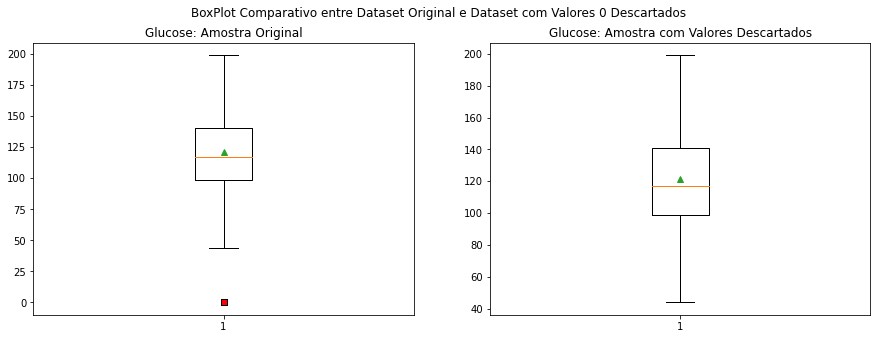

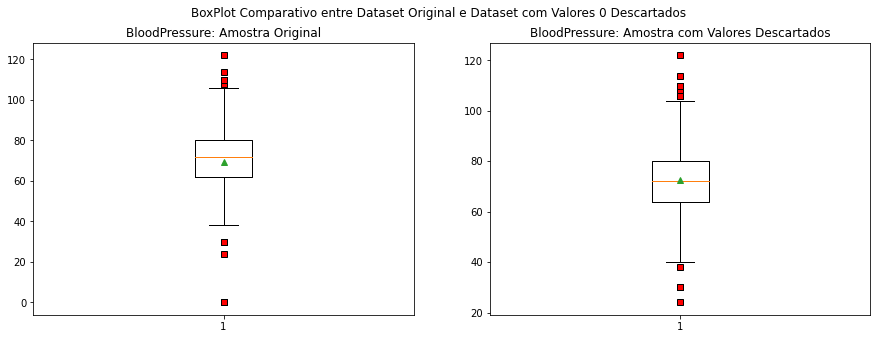

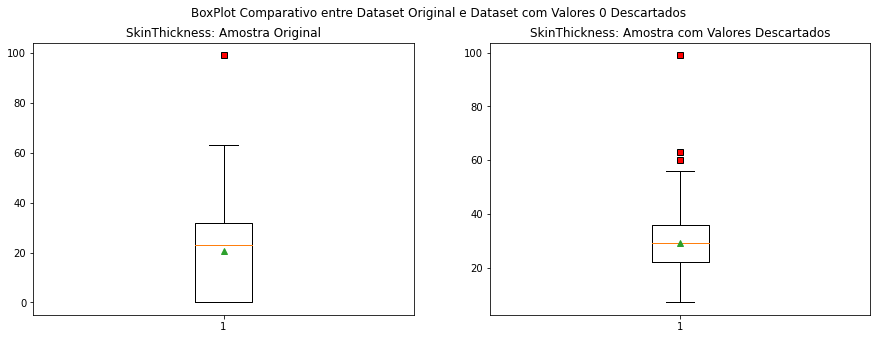

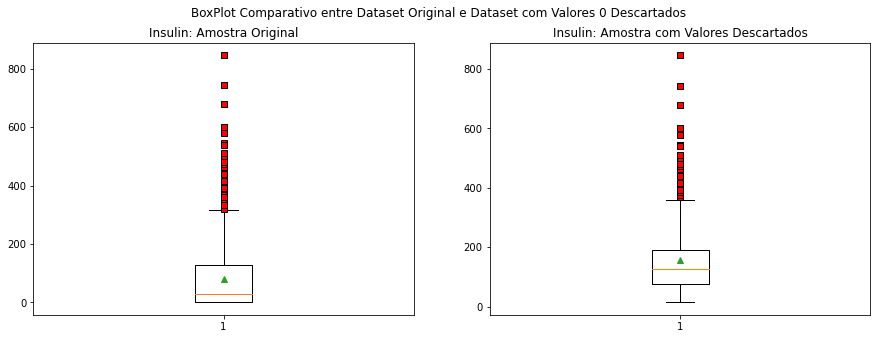

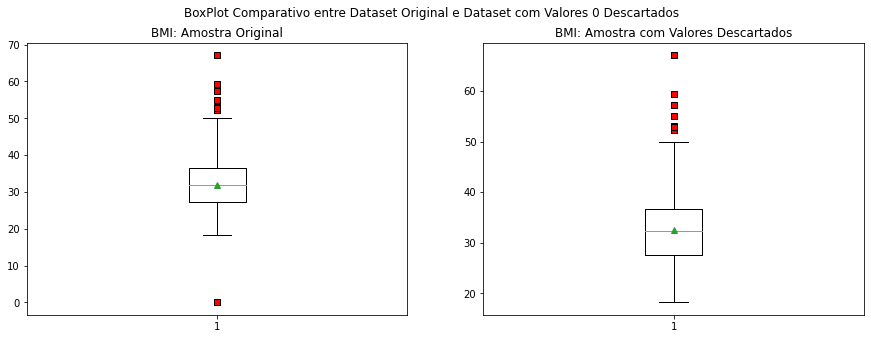

In [7]:
for item in aux:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle('BoxPlot Comparativo entre Dataset Original e Dataset com Valores 0 Descartados')
    aux_df = df[item]
    ax1.boxplot(aux_df, flierprops={'markerfacecolor': 'r', 'marker': 's'}, showmeans=True)
    ax1.set_title(f'{item}: Amostra Original')
    ax2.boxplot(aux_df[aux_df != 0], flierprops={'markerfacecolor': 'r', 'marker': 's'}, showmeans=True)
    ax2.set_title(f'{item}: Amostra com Valores Descartados')
    plt.show()

Podemos observar que, em: <br/>

Glucose, BloodPressure e BMI: Existe uma variação mínima entre os gráficos. A mais notória é que os valores 0 são descritos como outliers dos dados. Para correção descartaremos estes dados e assumiremos eles como a média dos demais.

SkinThickness: Possui muitos dados faltantes, cerca de 30%, e isso altera significativamente a distribuição de densidade desta caracteríistica. Por hora, estes valores também serão substituídos pela média dos demais para avaliarmos o seu impacto no resultado.

Insulin: Muitos dados com valores faltantes, próximo a metade deles (49%). Além disso, muitos resultados são tratados aparentemente como outliers, podendo ser um indicativo para esta característica variar muito de pessoa para pessoa. Sendo assim, descartaremos esta informação do modelo, pois torna-se difícil a substituição destes dados por algum outro valor estatístico referente aos demais.

In [8]:
#Corrigir valores 0 para a média dos demais dados conforme observado
df_corrigido = df[['Glucose', 'BloodPressure', 'BMI','SkinThickness']].replace(0, np.nan)
df_corrigido = df_corrigido.fillna(df_corrigido.mean())

for coluna in df.columns:
    if coluna not in df_corrigido.columns:
        df_corrigido[coluna] = df[coluna] 
        
#Excluir a coluna Insulin do modelo
df_corrigido = df_corrigido.drop('Insulin', axis=1)

Após o tratamento dos dados conforme observado acima, teremos uma nova estatística sobre eles.

In [9]:
#Exibir nova estatística do modelo
display(df_corrigido.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.00000,99.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


Vamos analisar também como a qualidade individual dos dados de entrada influenciam no resultado da classificação.<br/>
Abaixo plotaremos o gráfico de correlação entre todas as variáveis do problema.

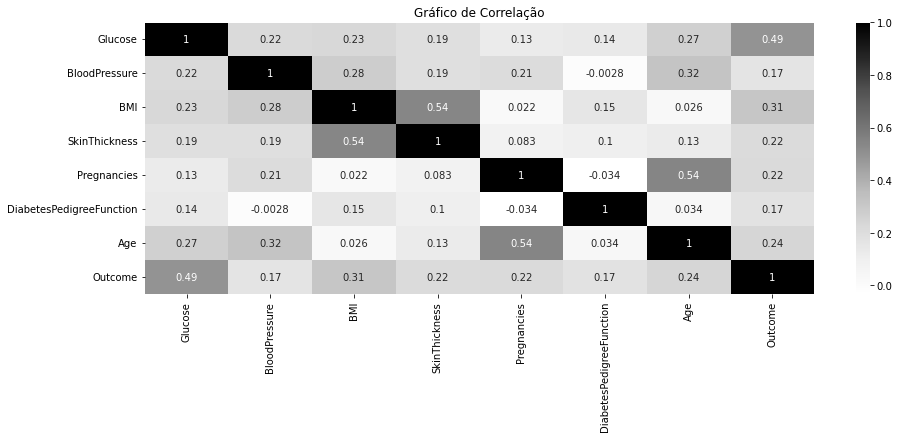

In [10]:
#Exibir correlação das informações
plt.figure(figsize=(15,5))
sns.heatmap(df_corrigido.corr(), cmap='Greys', annot=True)
plt.title('Gráfico de Correlação')
plt.show()

Pelo gráfico de correlação acima, notamos que _Glucose_ e _BMI_ possuem maior correlação individual com o resultado (_Outcome_) do que as demais características. Porém nada muito significativo se avaliadas individualmente com relação a predisposição ao diabetes.

Nota-se também uma certa correlação entre _Age_ e _Pregnancies_, e entre _BMI_ e _SkinThickness_.

Agora, a distribuição amostral dos pacientes diabéticos e não diabéticos pode ser observada abaixo:

Quantidade de pessoas com Diabetes: 268
Quantidade de pessoas sem Diabetes: 500


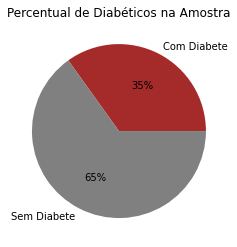

In [11]:
#Checar a distribuição dos pacientes com relação a diabetes
positivo_para_diabetes = df_corrigido.groupby('Outcome').count().iloc[1][0]
negativo_para_diabetes = df_corrigido.groupby('Outcome').count().iloc[0][0]

print(f'Quantidade de pessoas com Diabetes: {positivo_para_diabetes}')
print(f'Quantidade de pessoas sem Diabetes: {negativo_para_diabetes}')

#Criar gráfico
plt.pie([positivo_para_diabetes, negativo_para_diabetes], labels=['Com Diabete', 'Sem Diabete'], colors=['Brown', 'Grey'], autopct='%1.0f%%' )
plt.title('Percentual de Diabéticos na Amostra')
plt.show()

Aparentemente esta base de dados apresenta uma boa distribuição de dados, visto que, imagino eu, a população que contém diabete de algum tipo ser realmente em menor proporção.

**Separar os Dados**

Para criação do modelo de previsão precisamos dividir nosso dataset entre as características de entrada e o resultado esperado. <br/>
Por isso iremos separar os dados em x e y, sendo:
- y o resultado, ou seja, a categoria a ser classificada. Variável dependente. 
- x são as características dos dados que possibilitam encontrar o y. Variável independente.

In [12]:
y = df_corrigido['Outcome']
x = df_corrigido.drop('Outcome', axis=1)

Separamos agora os dados para treino e teste do modelo.

In [13]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)
#test_size para definir o ponto em que os dados serão particionados 25% para teste e o demais para treino
#random_state para que a chamada da função seja replicável. Caso não seja informado os dados serão sempre diferentes

Como nossas características tem valores muito diferentes entre si, é uma boa prática padronizarmos todas as entradas. <br/>
Modelos de machine learning se beneficiam muito com esta técnica e, também, nos torna mais fácil entender a importância de cada característica, pois conseguiremos ver o peso de cada uma sem o viés de sua dimensionalidade. <br/>

Para padronização utilizaremos a fórmula do z-score: 

<br/>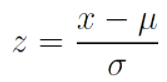<br/>

Mas o que é padronizar os dados? <br/>

Padronizar é transformar todas as variáveis para uma mesma ordem de grandeza. Variáveis padronizadas podem ser diretamente comparáveis, pois elas são expressas em unidades de desvio padrão e não possuem dimensão. Possuem média igual a 0 desvio-padrão igual a 1.

In [14]:
#Padronizar variáveis independentes
z_x_treino = (x_treino - x_treino.mean()) / x_treino.std()
z_x_teste = (x_teste - x_teste.mean()) / x_teste.std()

In [15]:
#Visualizar estatística dos dados padronizados
display(pd.concat([z_x_teste, z_x_treino]).describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,5.012628e-16,0.999348,-2.423498,-0.732489,-0.149786,0.607554,2.530225
BloodPressure,768.0,-2.698941e-16,0.999348,-3.707279,-0.659683,-0.035521,0.604625,4.144687
BMI,768.0,-4.042999e-15,0.999348,-2.091156,-0.724792,-0.028963,0.593102,4.933558
SkinThickness,768.0,5.235468e-15,0.999348,-2.494484,-0.487905,-0.024896,0.403908,7.761365
Pregnancies,768.0,-9.396419e-19,0.999348,-1.204405,-0.829143,-0.245297,0.630473,3.841629
DiabetesPedigreeFunction,768.0,6.878179e-16,0.999348,-1.174949,-0.693220,-0.299476,0.456409,5.870952
Age,768.0,-8.095376e-17,0.999348,-1.048320,-0.798389,-0.381838,0.617884,3.950292


Vemos agora que nossas características estão com resultados mais parecidos entre si. Diferentemente do visualizado anteriormente antes da padronização.

**Criar Modelo de Regressão Logística** 

Com nossos dados separados, agora já podemos criar o modelo de machine learning.

In [16]:
classificar_diabetes = LogisticRegression(max_iter=200)
#max_iter = número máximo de iterações tomadas para os solucionadores convergirem.
#Teve de ser explicitada porque com o valor padrão igual a 100, o modelo não convergiu a um resultado

#Treinar Modelo
classificar_diabetes.fit(z_x_treino, y_treino)

#Testar Modelo
y_pred = classificar_diabetes.predict(z_x_teste)

**Avaliar Modelo**

**Matriz de Confusão**:

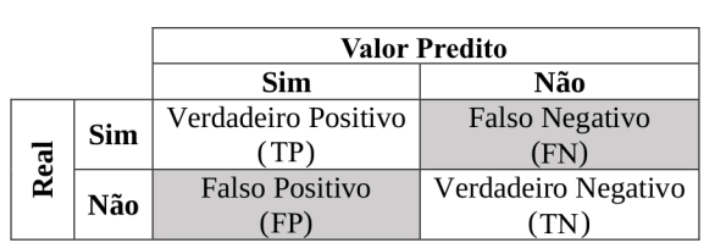

**Métricas obtidas a partir dela**:

**Precisão = TP / (TP+FP)**: <br/>
Mede quantas estão corretas dentre todos os valores preditos de classe Positivo que o modelo fez. A precisão é uma boa medida para determinar, quando os custos do Falso Positivo são altos. Por exemplo, na detecção de spam de e-mail um falso positivo significa que um e-mail que não é spam (negativo real) foi identificado como spam (spam previsto). O usuário de email pode perder emails importantes se a precisão não for alta para o modelo de detecção de spam.

**Recal = TP / (TP+FN)**: <br/>
Mede quantas estão corretas dentre todas as situações reais da classe Positivo como valor esperado. Aplicando o mesmo entendimento, sabemos que Recall será a métrica do modelo que usamos para selecionar nosso melhor modelo quando há um alto custo associado a Falso Negativo. Por exemplo, se um paciente doente (Real Positivo) passa pelo teste e é previsto como não doente (Previsto Negativo). O custo associado ao Falso Negativo será extremamente alto se a doença for contagiosa ou necessitar de um diagnóstico precoce. 

**F1-Score = 2x (Precisão x Recall / Precisão + Recall)**: <br/>
Média harmônica entre precisão e recall. A F1-Score pode ser uma medida melhor a ser usada se precisarmos buscar um equilíbrio entre precisão e recall e houver uma distribuição de classes desigual. Ou seja, quando se tem um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.

**Acuracidade = (TP+VN) / (TP+TN+FP+FN)**: <br/>
Indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente. 

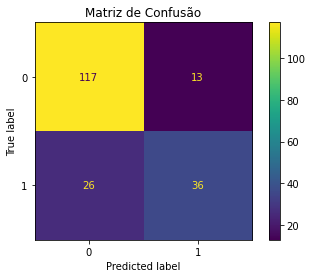



Relatório de Classificação:

               precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [17]:
#Comparar os valores previstos de y pelo modelo com os valores y_teste
#Criar matriz de confusão
grafico = ConfusionMatrixDisplay(confusion_matrix(y_teste, y_pred), display_labels=classificar_diabetes.classes_)
grafico.plot()
plt.title('Matriz de Confusão')
plt.show()

print('\n\nRelatório de Classificação:\n\n',classification_report(y_teste, y_pred))

Pela matriz de confusão podemos observar que:

- O modelo acertou 117 pacientes que não possuíam diabetes e 36 que eram diabéticos
- O modelo errou 13 pacientes que não eram diabéticos dizendo serem e 26 que eram dizendo não serem 

Complementando com o relatório de classificação, temos que, nosso modelo obteve:

- Acuracidade de 80% em suas classificações.
- 82% de precisão sobre os pacientes não diabéticos e 73% sobre os diabéticos
- 90% de recall sobre os não diabéticos e 58% sobre os diabéticos.

**Coeficiente de Importância**

Como dito anteriormente, como padronizamos nossos dados, agora podemos ver o peso da influência de cada característica no resultado do modelo.

Pela padronização feita, não teremos vieses por diferença de escala entre cada variável de entrada.

Este coeficiente representará o x da função sigmoide demonstrada anteriormente. Como o ponto de inflexão da função ocorre em x igual a 0, trazendo y=0,5, caso o coeficiente seja menor que 0 indicará a não ocorrência do evento (y < 0,5) e caso seja maior que 0 indicará a ocorrência do evento (y > 0,5). Sendo assim, quanto maior ou menor o valor do coeficiente maior será a probabilidade do evento acontecer ou não acontecer, respectivamente.

,Coeficiente de Importancia
Glucose,1.070970
BMI,0.710969
Pregnancies,0.317503
DiabetesPedigreeFunction,0.273477
Age,0.248466
SkinThickness,-0.075616
BloodPressure,-0.176058


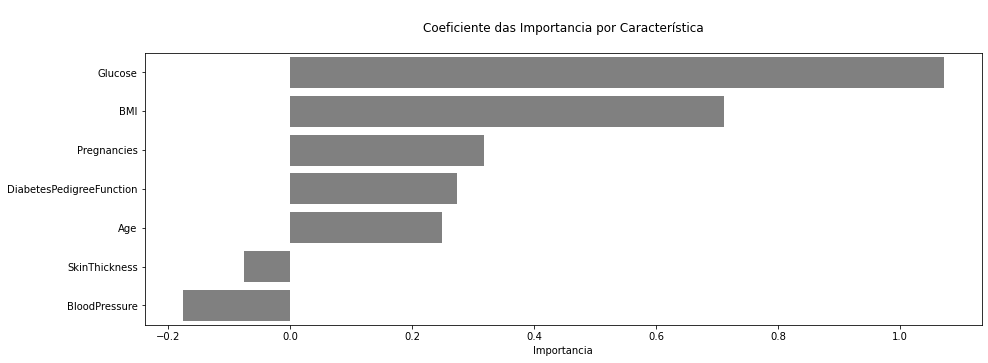

In [18]:
#Calcular a importância (coef_)
importancia_caracteristicas = pd.DataFrame(data=classificar_diabetes.coef_, columns=z_x_treino.columns)
#Organizar de forma decrescente
importancia_caracteristicas = importancia_caracteristicas.transpose().sort_values(by=0, ascending=False)
display(importancia_caracteristicas.rename(columns={0: 'Coeficiente de Importancia'}))

#Exibir gráfico das importancias
plt.figure(figsize=(15,5))
sns.barplot(x=importancia_caracteristicas[0], y=importancia_caracteristicas.index, color='Grey')
plt.xlabel('Importancia')
plt.title('\nCoeficiente das Importancia por Característica\n')
plt.show()

Observações do Coeficiente de Importância obtido:

- Glucose e BMI são as características mais relevantes no processo de classificação da diabetes. Por serem valores positivos concluímos que quanto mais alto seus valores, maiores serão as chances dos pacientes se tornarem diabéticos.


- SkinThickness e BloodPressure possuem valores negativos, indicando que seus valores são inversamente proporcionais ao fator diabetes. Ou seja, quanto maiores seus valores maiores são as chances de a pessoa não possuir diabetes.


- SkinThickness é a característica menos importante para o modelo. Como anteriormente havíamos notado que 30% dos seus dados estavam faltando, fica agora mais um indicativo para exclusão desta característica do modelo. 

**Primeira Tentativa de Melhoria do Modelo**

Devido as observações feitas anteriormente, retiraremos agora do modelo a característica SkinThickness para ver como o modelo se comporta e se existe alguma melhoria significativa nos resultados.

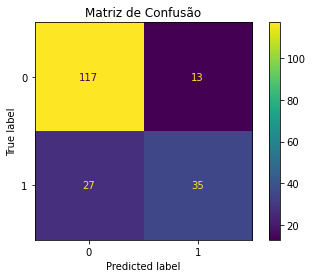



Relatório de classificação:

               precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



In [19]:
#Excluir SkinThickness
z_x_treino = z_x_treino.drop('SkinThickness', axis=1)
z_x_teste = z_x_teste.drop('SkinThickness', axis=1)

#Treinar Modelo
classificar_diabetes.fit(z_x_treino, y_treino)

#Testar Modelo
y_pred = classificar_diabetes.predict(z_x_teste)

#Avaliar Modelo
grafico = ConfusionMatrixDisplay(confusion_matrix(y_teste, y_pred), display_labels=classificar_diabetes.classes_)
grafico.plot()
plt.title('Matriz de Confusão')
plt.show()
print('\n\nRelatório de classificação:\n\n', classification_report(y_teste, y_pred))

O novo modelo agora teve a seguinte avaliação:

- O modelo acertou os mesmos 117 pacientes que não possuíam diabetes, porém, agora, 35 que eram diabéticos. 1 a menos. 
- O modelo errou os mesmos 13 pacientes que não eram diabéticos dizendo serem e, agora, 27 que eram dizendo não serem. Também 1 a menos. 

Complementando com o relatório de classificação, agora temos que, nosso modelo possui:

- Acuracidade de 79% em suas classificações.
- 81% de precisão sobre os pacientes não diabéticos e 73% sobre os diabéticos
- 90% de recall sobre os não diabéticos e 56% sobre os diabéticos.

Não houve melhoria no modelo, os valores foram ligeiramente piores. Mas, como a diferença foi mínima, optaremos pela simplificação do modelo, mantendo a exclusão desta característica.

,Coeficiente de Importancia
Glucose,1.071109
BMI,0.669222
Pregnancies,0.314990
DiabetesPedigreeFunction,0.273530
Age,0.243087
BloodPressure,-0.176557


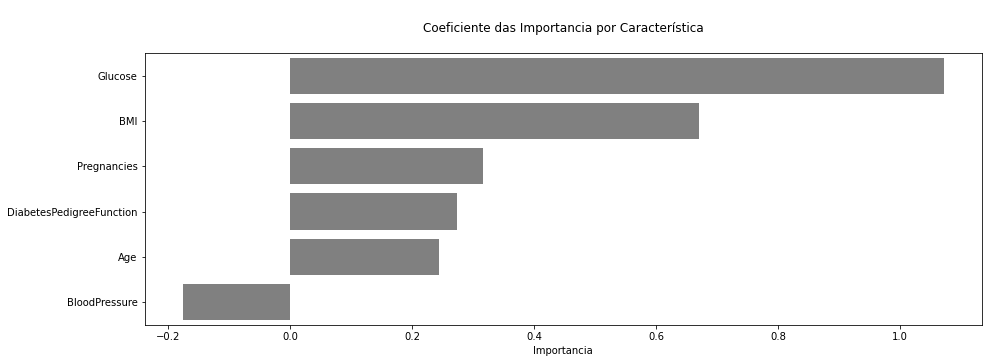

In [20]:
#Calcular a importância (coef_)
importancia_caracteristicas = pd.DataFrame(data=classificar_diabetes.coef_, columns=z_x_treino.columns)
#Organizar de forma decrescente
importancia_caracteristicas = importancia_caracteristicas.transpose().sort_values(by=0, ascending=False)
display(importancia_caracteristicas.rename(columns={0: 'Coeficiente de Importancia'}))

#Exibir gráfico das importancias
plt.figure(figsize=(15,5))
sns.barplot(x=importancia_caracteristicas[0], y=importancia_caracteristicas.index, color='Grey')
plt.xlabel('Importancia')
plt.title('\nCoeficiente das Importancia por Característica\n')
plt.show()

    O Coeficiente de Importância das Características mantém o mesmo padrão anterior. Mantemos então as mesmas observações já feitas.

**Segunda Tentativa de Melhoria**

Uma nova tentativa de melhoria será feita. Agruparemos nossas variáveis contínuas de entrada em classes, transformando nossos dados contínuos em dados discretos. Assim poderemos diminuir um pouco a complexidade das informações e, quem sabe melhorar o resultado do modelo.

Como em um histograma, encontraremos o número de classes (k) ideal para nosso volume de dados amostrais bem como sua amplitude, limite superior e inferior de cada classe, (h).

Para o número de classes existe a seguinte regra para boas práticas: 

Tamanho da Amostra: Número de Classes <br/>
Abaixo de 50: 5 a 7       <br/>
De 50 a 100: 6 a 10      <br/>
De 100 a 250: 7 a 12      <br/>
Acima de 250: 10 a 20      <br/>

Existem outras regras para também encontrar o k ideal, como por exemplo, a regra de Sturges.

Já para a amplitude calcularemos, em cada variável de entrada, h = (Máx - Mín) / k. Sendo: <br/>
Máx: O máximo valor da mostra <br/>
Mín: O mínimo valor da amostra

In [21]:
print(f'Tamanho da amostra: {len(x)}')

Tamanho da amostra: 768


Com base na tabela de boas práticas e para não diluirmos demais nossas classes, assumiremos k igual a 15.

In [22]:
k = 15

Agrupando e discretizando os dados de entrada contínuos:

In [23]:
#Calcular o limite inferior de cada classe em cada variável
dict_h = {}
for coluna in df_corrigido.drop('Outcome', axis=1).columns:
    aux = []
    h = (df_corrigido[coluna].max() - df_corrigido[coluna].min())/k
    for i in range(0,k):
        aux.append(i*h)
        if i == (k-1):
            dict_h[coluna] = aux
            aux = []

In [24]:
#Montar o intervalo de classe [limite inferior, limite superior] em cada variável
dict_intervalo = {}
for coluna in df_corrigido.drop('Outcome', axis=1).columns:
    aux = []
    for i in range(0,k):
        try:
            aux.append([dict_h[coluna][i], dict_h[coluna][i+1]])
            dict_intervalo[coluna] = aux
        except:
            aux.append([dict_h[coluna][i], df_corrigido[coluna].max()+0.0001])
            dict_intervalo[coluna] = aux

In [25]:
#Encontar qual classe cada item do dataset pertence 
df_corrigido_agrupado = df_corrigido.copy()
#Montar classes para dados de entrada com valores contínuos (Glucose,BloodPressure,BMI,SkinThickness,DiabetesPedigreeFunction)
for coluna in df_corrigido.drop(['Age', 'Pregnancies', 'Outcome'], axis=1).columns:
    aux = []
    if coluna in dict_intervalo:
        for i in df_corrigido_agrupado[coluna].values:
            for j in range(0,k):
                if (i>=dict_intervalo[coluna][j][0]) and (i<dict_intervalo[coluna][j][1]):
                    aux.append(str(dict_intervalo[coluna][j][0])+'-'+str(dict_intervalo[coluna][j][1]))
                    pass
#Criar um dataset onde cada item da classe assuma o valor mediano da classe.
#Tornar valor contínuo em discreto
        coluna_intervalo = coluna+'_intervalo'
        coluna_intervalo_mediana = coluna_intervalo+'_mediana'
        df_corrigido_agrupado[coluna_intervalo] = aux
        aux = df_corrigido_agrupado[[coluna, coluna_intervalo]].groupby(coluna_intervalo).median()
        aux  = aux.rename(columns={coluna: coluna_intervalo_mediana})
        df_corrigido_agrupado = pd.merge(df_corrigido_agrupado, aux, on=coluna_intervalo)
        df_corrigido_agrupado = df_corrigido_agrupado.drop([coluna, coluna_intervalo], axis=1)
        df_corrigido_agrupado = df_corrigido_agrupado.rename(columns={coluna_intervalo_mediana: coluna})

In [26]:
#Visualizar a diferença entre o dataset original e o dataset agrupado
display('Quantidade de Valores Únicos ANTES do Agrupamento:',df_corrigido.nunique().sort_index(),'Quantidade de Valores Únicos DEPOIS do Agrupamento', df_corrigido_agrupado.nunique().sort_index())

'Quantidade de Valores Únicos ANTES do Agrupamento:'

Age                          52
BMI                         248
BloodPressure                47
DiabetesPedigreeFunction    517
Glucose                     136
Outcome                       2
Pregnancies                  17
SkinThickness                51
dtype: int64

'Quantidade de Valores Únicos DEPOIS do Agrupamento'

Age                         52
BMI                         10
BloodPressure               12
DiabetesPedigreeFunction    15
Glucose                     11
Outcome                      2
Pregnancies                 17
SkinThickness               11
dtype: int64

Após o agrupamento das variáveis contínuas de entrada, executaremos as mesmas tarefas executadas na primeira tentativa de melhoria já com o dataset corrigido e padronizado.

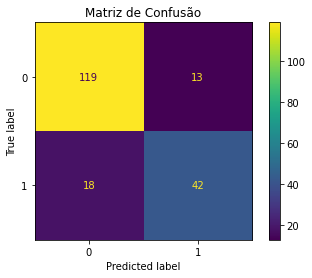



Relatório de classificação:

               precision    recall  f1-score   support

           0       0.87      0.90      0.88       132
           1       0.76      0.70      0.73        60

    accuracy                           0.84       192
   macro avg       0.82      0.80      0.81       192
weighted avg       0.84      0.84      0.84       192



In [27]:
#Separar os dados em x e y
y = df_corrigido_agrupado['Outcome']
x = df_corrigido_agrupado.drop('Outcome', axis=1)

#Separar os dados para treino e para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

#Padronizar variáveis independentes
z_x_treino = (x_treino - x_treino.mean()) / x_treino.std()
z_x_teste = (x_teste - x_teste.mean()) / x_teste.std()

#Manter a exclusão da caracteríistica SkinThickness
z_x_treino = z_x_treino.drop('SkinThickness', axis=1)
z_x_teste = z_x_teste.drop('SkinThickness', axis=1)

#Criar modelo
classificar_diabetes = LogisticRegression(max_iter=200)

#Treinar Modelo
classificar_diabetes.fit(z_x_treino, y_treino)

#Testar Modelo
y_pred = classificar_diabetes.predict(z_x_teste)

#Avaliar Modelo
grafico = ConfusionMatrixDisplay(confusion_matrix(y_teste, y_pred), display_labels=classificar_diabetes.classes_)
grafico.plot()
plt.title('Matriz de Confusão')
plt.show()

print('\n\nRelatório de classificação:\n\n', classification_report(y_teste, y_pred))

Pela matriz de confusão agora temos que:

- O modelo acertou 119 pacientes que não possuíam diabetes, 2 a mais que os outros modelos, e 42 que eram diabéticos, 6 a mais que o melhor modelo anterior
- O modelo errou os mesmos 13 pacientes que não eram diabéticos dizendo serem e 18 que eram dizendo não serem, 8 a menos que o melhor modelo anterior 

Complementando com o relatório de classificação, agora temos que, nosso modelo obteve:

- Acuracidade de 84% em suas classificações. Um aumento de 4% referente a melhor pontuação anterior
- 87% de precisão sobre os pacientes não diabéticos, aumento de 5%, e 76% sobre os diabéticos, aumento de 3%
- Os mesmos 90% de recall sobre os não diabéticos e 70% sobre os diabéticos, aumento de 12%.

,Coeficiente de Importancia
Glucose,0.938627
BMI,0.565491
Pregnancies,0.452905
DiabetesPedigreeFunction,0.411576
BloodPressure,0.076282
Age,0.041201


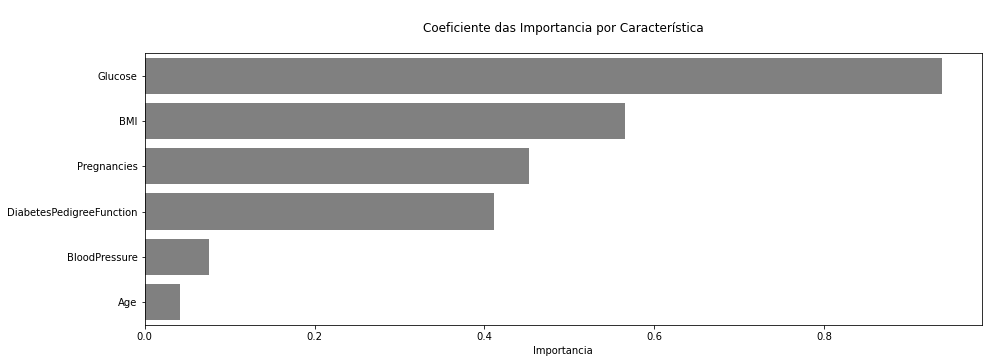

In [28]:
#Calcular a importância (coef_)
importancia_caracteristicas = pd.DataFrame(data=classificar_diabetes.coef_, columns=z_x_treino.columns)
#Organizar de forma decrescente
importancia_caracteristicas = importancia_caracteristicas.transpose().sort_values(by=0, ascending=False)
display(importancia_caracteristicas.rename(columns={0: 'Coeficiente de Importancia'}))

#Exibir gráfico das importancias
plt.figure(figsize=(15,5))
sns.barplot(x=importancia_caracteristicas[0], y=importancia_caracteristicas.index, color='Grey')
plt.xlabel('Importancia')
plt.title('\nCoeficiente das Importancia por Característica\n')
plt.show()

Com o agrupamento das informações podemos reparar que o fator BloodPressure tornou-se um coeficiente de importância positivo. Agora, mesmo que com menor influência que os demais, ele se relaciona de forma diretamente proporcional à classe diabetes.

Assumiremos este útlimo modelo como o ideal encontrado para o nosso problema proposto.

**Conclusão**

Finalizamos nosso modelo com uma acuracidade de 84%. conseguindo, chegar a acertar 87% das previsões para a não incidência da diabetes e 76% sobre sua incidência. Para chegar a este resultado levamos em consideração informações do paciente sobre número de gestações, idade, glicose, pressão arterial, IMC e _DiabetesPedigreeFunction_.